In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def one_pass_bar_algorithm(time_series, date_list=None):
    bar_lists = []
    maxima, minima = [], []
    direction = 1

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(0, len(time_series)-1):
        if (time_series[t+1] - time_series[t]) * direction < 0:
            if direction == 1:
                if len(maxima) != 0 and time_series[t] > maxima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(), bar_lists, date_list)
                maxima.append((t, time_series[t]))
            else:
                if len(minima) != 0 and time_series[t] < minima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(), bar_lists, date_list)
                minima.append((t, time_series[t]))
            direction = -direction
        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[-1][1]:
              output_bar(maxima.pop(), minima.pop(), bar_lists, date_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[-1][1]:
              output_bar(maxima.pop(), minima.pop(), bar_lists, date_list)
    output_remaining_bars(maxima, minima, bar_lists, date_list)
    return bar_lists

def output_bar(max_value, min_value, bar_lists, date_list=None):
    bar_lists.append([(max_value[0]-1, max_value[1]), (min_value[0]-1, min_value[1])])
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]-1}, {max_value[1]}) to ({min_value[0]-1}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, bar_lists, date_list=None):
    for i in range(min(len(maxima), len(minima))):
      bar_lists.append([(maxima[i][0]-1, maxima[i][1]), (minima[i][0]-1, minima[i][1])])
      if date_list is None:
        print(f"(remaining)Bar: ({maxima[i][0]-1}, {maxima[i][1]}) to ({minima[i][0]-1}, {minima[i][1]})")
      else:
        print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")


In [4]:
def modify(original_time_series, bar_lists, difference=0):
  indices_to_be_updated_list = []
  values_to_be_updated_list = []
  for bar_list in bar_lists:
    start_idx = bar_list[0][0]
    start_val = bar_list[0][1]
    end_idx = bar_list[1][0]
    end_val = bar_list[1][1]
    if start_val - end_val > difference: # check bar display(right)
      continue
    # ---
    #  |
    #  |
    if start_idx < end_idx:
      indices_to_be_updated = []
      for i in range(start_idx+1, len(original_time_series)):
        if original_time_series[i] <= start_val:
          indices_to_be_updated.append(i)
        else:
          break
      values_to_be_updated = start_val
    # ---
    # |
    # |
    else:                                # check bar display(left)
      indices_to_be_updated = []
      for i in reversed(range(0, start_idx)):
        if original_time_series[i] <= start_val:
          indices_to_be_updated.append(i)
        else:
          break
      values_to_be_updated = start_val
    indices_to_be_updated_list.append(indices_to_be_updated)
    values_to_be_updated_list.append(values_to_be_updated)
  print(indices_to_be_updated_list)
  print(values_to_be_updated_list)
  return indices_to_be_updated_list, values_to_be_updated_list


def get_result(time_series, indices_to_be_updated_list, values_to_be_updated_list):
  result = time_series.copy()
  for indices_to_be_updated, values_to_be_updated in zip(indices_to_be_updated_list, values_to_be_updated_list):
    for idx in indices_to_be_updated:
      result[idx] = max(result[idx], values_to_be_updated)
  return result

def get_result_remove(time_series, date_series, indices_to_be_updated_list, values_to_be_updated_list):
  for indices_to_be_updated, values_to_be_updated in zip(indices_to_be_updated_list, values_to_be_updated_list):
    for idx in indices_to_be_updated:
      time_series = time_series.pop(idx)
      date_series = date_series.pop(idx)
  return time_series, date_series

In [5]:
# Load the data
data = pd.read_csv('/Users/eeevashen/Desktop/Apple_stock_data_6M.csv',low_memory=False)
# take out the Date column and Close/Last column
data = data[['Date','Close/Last']]
# make the whole dataframe upside down
data = data[::-1]
# seperate the Date column by month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

# make the Date column as string as the format of 'YYYY-MM-DD'
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
# make the Close/Last column as float
data['Close/Last'] = data['Close/Last'].str.replace('$','').astype(float)
# make the Date column and Close/Last column as a tuple
tuple_data = list(zip(data['Date'],data['Close/Last']))


# get all data of month == 6
data_6 = data[data['Month']==6]
# take out the Close/Last column and make it as a list
price_6 = data_6['Close/Last'].tolist()
print(price_6)
# take out the Date column and make it as a list
date_6 = data_6['Date'].tolist()

# get all data of month == 2
data_2 = data[data['Month']==2]
# take out the Close/Last column and make it as a list
price_2 = data_2['Close/Last'].tolist()
# take out the Date column and make it as a list
date_2 = data_2['Date'].tolist()

# get all data of month == 4
data_4 = data[data['Month']==4]
# take out the Close/Last column and make it as a list
price_4 = data_4['Close/Last'].tolist()
# take out the Date column and make it as a list
date_4 = data_4['Date'].tolist()


[194.03, 194.35, 195.87, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67]


(normal)Bar: (2, 169.65) to (1, 168.84)
(normal)Bar: (4, 169.58) to (3, 168.82)
(normal)Bar: (6, 169.67) to (5, 168.45)
(normal)Bar: (0, 170.03) to (7, 167.78)
(normal)Bar: (18, 169.89) to (19, 169.3)
(remaining)Bar: (9, 176.55) to (14, 165.0)
(remaining)Bar: (20, 173.5) to (21, 170.33)
[]
[]


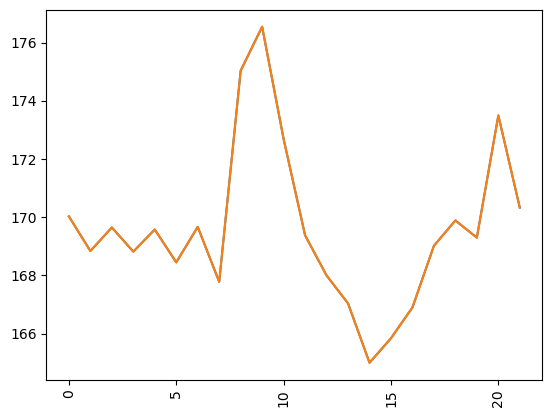

In [6]:
# time_series = [0, 11, 9, 4, 3, 5, 8, 6, 1, 2, 7, 10, 12]
time_series = price_4

bar_lists = one_pass_bar_algorithm(time_series)
indices_to_be_updated_list, values_to_be_updated_list = modify(time_series, bar_lists, difference = 0.5)
updated_time_series = get_result(time_series, indices_to_be_updated_list, values_to_be_updated_list)
plt.figure()
plt.plot(time_series)
plt.plot(updated_time_series)
plt.xticks(rotation=90)
plt.show()

In [10]:
print(type(time_series[1]))
print(bar_lists)

<class 'float'>
[[(2, 169.65), (1, 168.84)], [(4, 169.58), (3, 168.82)], [(6, 169.67), (5, 168.45)], [(0, 170.03), (7, 167.78)], [(18, 169.89), (19, 169.3)], [(9, 176.55), (14, 165.0)], [(20, 173.5), (21, 170.33)]]


(normal)Bar: (2, 169.65) to (1, 168.84)
(normal)Bar: (4, 169.58) to (3, 168.82)
(normal)Bar: (6, 169.67) to (5, 168.45)
(normal)Bar: (0, 170.03) to (7, 167.78)
(normal)Bar: (18, 169.89) to (19, 169.3)
(remaining)Bar: (9, 176.55) to (14, 165.0)
(remaining)Bar: (20, 173.5) to (21, 170.33)
[[3], [19]]
[169.58, 169.89]


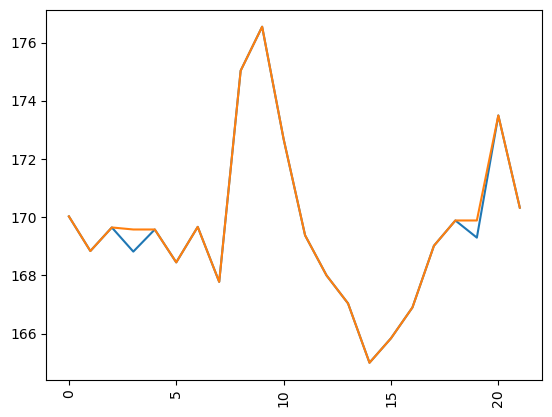

In [24]:
# time_series = [0, 11, 9, 4, 3, 5, 8, 6, 1, 2, 7, 10, 12]
time_series = price_4

bar_lists = one_pass_bar_algorithm(time_series)
indices_to_be_updated_list, values_to_be_updated_list = modify(time_series, bar_lists, difference = 0.8)
updated_time_series = get_result(time_series, indices_to_be_updated_list, values_to_be_updated_list)
plt.figure()
plt.plot(time_series)
plt.plot(updated_time_series)
plt.xticks(rotation=90)
plt.show()

(normal)Bar: (2, 169.65) to (1, 168.84)
(normal)Bar: (4, 169.58) to (3, 168.82)
(normal)Bar: (6, 169.67) to (5, 168.45)
(normal)Bar: (0, 170.03) to (7, 167.78)
(normal)Bar: (18, 169.89) to (19, 169.3)
(remaining)Bar: (9, 176.55) to (14, 165.0)
(remaining)Bar: (20, 173.5) to (21, 170.33)
[[1], [3], [19]]
[169.65, 169.58, 169.89]


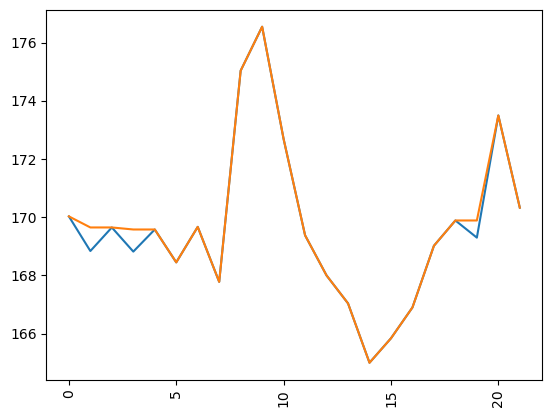

In [25]:
# time_series = [0, 11, 9, 4, 3, 5, 8, 6, 1, 2, 7, 10, 12]
time_series = price_4

bar_lists = one_pass_bar_algorithm(time_series)
indices_to_be_updated_list, values_to_be_updated_list = modify(time_series, bar_lists, difference = 1)
updated_time_series = get_result(time_series, indices_to_be_updated_list, values_to_be_updated_list)
plt.figure()
plt.plot(time_series)
plt.plot(updated_time_series)
plt.xticks(rotation=90)
plt.show()

(normal)Bar: (4, 169.67) to (3, 168.45)
(normal)Bar: (0, 170.03) to (5, 167.78)
(remaining)Bar: (7, 176.55) to (12, 165.0)
(remaining)Bar: (17, 173.5) to (18, 170.33)
[]
[]


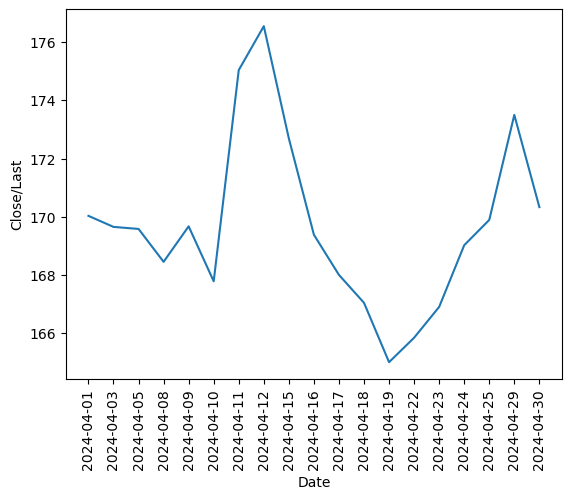

In [35]:
# time_series = [0, 11, 9, 4, 3, 5, 8, 6, 1, 2, 7, 10, 12]
time_series = price_4
date_series = date_4

bar_lists = one_pass_bar_algorithm(time_series)
indices_to_be_updated_list, values_to_be_updated_list = modify(time_series, bar_lists, difference = 1)
updated_time_series = get_result_remove(time_series,date_series, indices_to_be_updated_list, values_to_be_updated_list)
plt.figure()
plt.plot(date_series,time_series)
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.xticks(rotation=90)
plt.show()

(normal)Bar: (2, 195.87) to (3, 194.48)
(normal)Bar: (4, 196.89) to (5, 193.12)
(normal)Bar: (8, 214.24) to (9, 212.49)
[[3], [5], [9]]
[195.87, 196.89, 214.24]


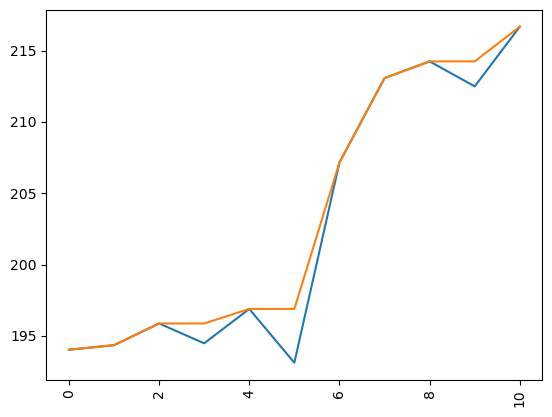

In [18]:
time_series = price_6


bar_lists = one_pass_bar_algorithm(time_series)
indices_to_be_updated_list, values_to_be_updated_list = modify(time_series, bar_lists, difference = 10)
updated_time_series = get_result(time_series, indices_to_be_updated_list, values_to_be_updated_list)
plt.figure()
plt.plot(time_series)
plt.plot(updated_time_series)
plt.xticks(rotation=90)
plt.show()

从这往上-------------------------------------------------------------------------

local max idx:  [0, 4, 6, 10, 13]
local min idx:  [1, 5, 7, 11, 16]
Original list: [194, 192.5, 193, 194.35, 195.87, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67, 220, 218, 217, 210]
Interpolated list based on local extrema: [194.0, 192.5, 193.62333333333333, 194.74666666666667, 195.87, 194.48, 196.89, 193.12, 200.16, 207.20000000000002, 214.24, 212.49, 216.245, 220.0, 216.66666666666666, 213.33333333333334, 210.0]


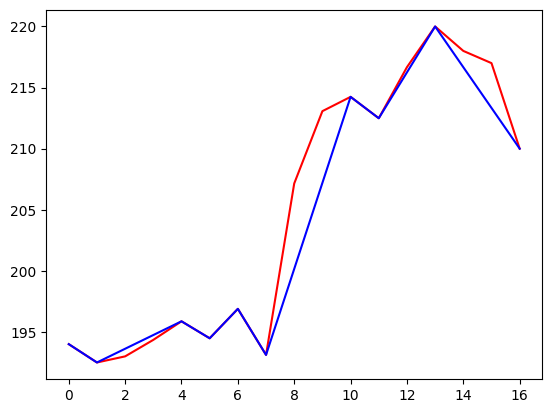

In [3]:
import matplotlib.pyplot as plt
def find_local_extrema(data):
  local_min_idx = []
  local_max_idx = []
  # we should have at least two points in the sequence
  assert len(data) > 1
  # assume the data is increase: increasing
  #   before the first and after the last point
  if data[0] > data[1]:
    local_max_idx.append(0)
  for i in range(1, len(data)-1):
    if data[i] > data[i-1] and data[i] > data[i+1]:
      local_max_idx.append(i)
    if data[i] < data[i-1] and data[i] < data[i+1]:
      local_min_idx.append(i)
  if data[-2] > data[-1]:
    local_min_idx.append(len(data)-1)
  print("local max idx: ", local_max_idx)
  print("local min idx: ", local_min_idx)
  return local_max_idx, local_min_idx

def get_local_extrema_indices(local_max_idx, local_min_idx):
  local_extrema_indices = []
  for i in range(len(local_max_idx)+len(local_min_idx)):
    if i % 2 == 0:
      local_extrema_indices.append(local_max_idx[i//2])
    else:
      local_extrema_indices.append(local_min_idx[i//2])
  return local_extrema_indices

def interpolate_between_extrema(data, local_extrema_indices):
    interpolated_list = data.copy()
    # Interpolate before the first extrema point
    if local_extrema_indices[0] != 0:
      start_index = 0
      end_index = local_extrema_indices[0]
      start_value = data[start_index]
      end_value = data[end_index]

      for j in range(start_index, end_index + 1):
          # Linear interpolation
          t = (j - start_index) / (end_index - start_index)
          interpolated_list[j] = start_value + t * (end_value - start_value)

    # Interpolate between each pair of extrema
    for i in range(len(local_extrema_indices) - 1):
        start_index = local_extrema_indices[i]
        end_index = local_extrema_indices[i + 1]
        start_value = data[start_index]
        end_value = data[end_index]

        for j in range(start_index, end_index + 1):
            # Linear interpolation
            t = (j - start_index) / (end_index - start_index)
            interpolated_list[j] = start_value + t * (end_value - start_value)

    # Interpolate after the last extrema point
    if local_extrema_indices[-1] != len(data) - 1:
      start_index = local_extrema_indices[-1]
      end_index = len(data) - 1
      start_value = data[start_index]
      end_value = data[end_index]

      for j in range(start_index, end_index + 1):
          # Linear interpolation
          t = (j - start_index) / (end_index - start_index)
          interpolated_list[j] = start_value + t * (end_value - start_value)

    return interpolated_list

# Example usage
data = [194, 192.5, 193, 194.35, 195.87, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67, 220, 218, 217, 210]

local_max_idx, local_min_idx = find_local_extrema(data)
local_extrema_indices = get_local_extrema_indices(local_max_idx, local_min_idx)
interpolated_list = interpolate_between_extrema(data, local_extrema_indices)

print("Original list:", data)
print("Interpolated list based on local extrema:", interpolated_list)

plt.figure()
plt.plot(data, color="r")
plt.plot(interpolated_list, color="b")
plt.show()


[194, 192.5, 193, 194.35, 195.87, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67, 220, 218, 217, 210]
local max idx:  [0, 4, 6, 10, 13]
local min idx:  [1, 5, 7, 11, 16]
[0, 6, 10, 13] [1, 7, 11, 16]


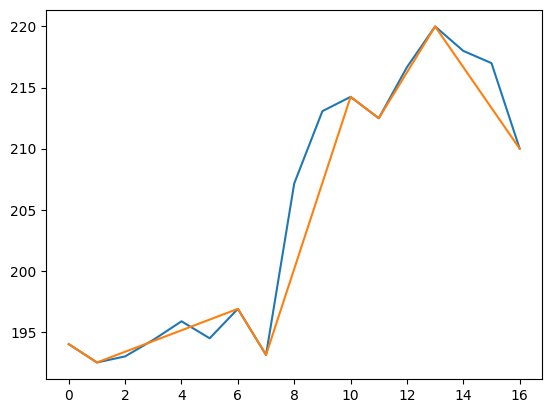

In [9]:
def deleteOnce(data, local_max_idx, local_min_idx, diff = 0):
  assert len(local_min_idx) != 0
  for i in range(len(local_min_idx)-1):
    if data[local_min_idx[i]] + diff > data[local_max_idx[i]]:
      deleted = True
      del local_max_idx[i]
      del local_min_idx[i]
      return True, local_max_idx, local_min_idx
    if data[local_min_idx[i]] + diff > data[local_max_idx[i+1]]:
      deleted = True
      del local_max_idx[i+1]
      del local_min_idx[i]
      return True, local_max_idx, local_min_idx
  if data[local_min_idx[-1]] + diff > data[local_max_idx[-1]]:
    deleted = True
    del local_max_idx[-1]
    del local_min_idx[-1]
    return True, local_max_idx, local_min_idx
  return False, local_max_idx, local_min_idx


print(data)
local_max_idx, local_min_idx = find_local_extrema(data)
while deleteOnce(data, local_max_idx, local_min_idx, diff = 1.5)[0] is True:
  print(local_max_idx, local_min_idx)
local_extrema_indices = get_local_extrema_indices(local_max_idx, local_min_idx)
interpolated_list = interpolate_between_extrema(data, local_extrema_indices)
plt.figure()
plt.plot(data)
plt.plot(interpolated_list)
plt.show()

In [10]:
import matplotlib.pyplot as plt
def find_local_extrema(data):
  local_min_idx = []
  local_max_idx = []
  # we should have at least two points in the sequence
  assert len(data) > 1
  # assume the data is increase: increasing
  #   before the first and after the last point
  if data[0] > data[1]:
    local_max_idx.append(0)
  for i in range(1, len(data)-1):
    if data[i] > data[i-1] and data[i] > data[i+1]:
      local_max_idx.append(i)
    if data[i] < data[i-1] and data[i] < data[i+1]:
      local_min_idx.append(i)
  if data[-2] > data[-1]:
    local_min_idx.append(len(data)-1)
  print("local max idx: ", local_max_idx)
  print("local min idx: ", local_min_idx)
  return local_max_idx, local_min_idx

def deleteOnce(data, local_max_idx, local_min_idx, diff = 0):
  assert len(local_min_idx) != 0
  for i in range(len(local_min_idx)-1):
    if data[local_min_idx[i]] + diff > data[local_max_idx[i]]:
      deleted = True
      del local_max_idx[i]
      del local_min_idx[i]
      return True, local_max_idx, local_min_idx
    if data[local_min_idx[i]] + diff > data[local_max_idx[i+1]]:
      deleted = True
      del local_max_idx[i+1]
      del local_min_idx[i]
      return True, local_max_idx, local_min_idx
  if data[local_min_idx[-1]] + diff > data[local_max_idx[-1]]:
    deleted = True
    del local_max_idx[-1]
    del local_min_idx[-1]
    return True, local_max_idx, local_min_idx
  return False, local_max_idx, local_min_idx


data = [194, 192.5, 193, 194.35, 195.87, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67, 220, 218, 217, 210]
local_max_idx, local_min_idx = find_local_extrema(data)
while deleteOnce(data, local_max_idx, local_min_idx, diff = 1.5)[0] is True:
  print(local_max_idx, local_min_idx)



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# Load the data
data = pd.read_csv('Apple_stock_data_6M.csv',low_memory=False)
# take out the Date column and Close/Last column
data = data[['Date','Close/Last']]
# make the whole dataframe upside down
data = data[::-1]
# seperate the Date column by month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

In [100]:
# print the first 5 rows of the data and the last 5 rows of the data
print(data.head())
print(data.tail())

          Date Close/Last  Month
124 2023-12-18    $195.89     12
123 2023-12-19    $196.94     12
122 2023-12-20    $194.83     12
121 2023-12-21    $194.68     12
120 2023-12-22    $193.60     12
        Date Close/Last  Month
4 2024-06-11    $207.15      6
3 2024-06-12    $213.07      6
2 2024-06-13    $214.24      6
1 2024-06-14    $212.49      6
0 2024-06-17    $216.67      6


In [107]:
# make the Date column as string as the format of 'YYYY-MM-DD'
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
# make the Close/Last column as float
data['Close/Last'] = data['Close/Last'].str.replace('$','').astype(float)
# make the Date column and Close/Last column as a tuple
tuple_data = list(zip(data['Date'],data['Close/Last']))

In [108]:
print(tuple_data)     # tupeel_data is a list of tuple
print(type(tuple_data[0])) # a pair like ('2024-06-17', '$216.67')
print(type(tuple_data[0][0]),type(tuple_data[0][1])) # <class 'str'> <class 'str'>
# take out the second element of the tuple_data and make it as a array
# delete the $ sign and convert the string to float
price = [i[1] for i in tuple_data]
print(price)

[('2023-12-18', 195.89), ('2023-12-19', 196.94), ('2023-12-20', 194.83), ('2023-12-21', 194.68), ('2023-12-22', 193.6), ('2023-12-26', 193.05), ('2023-12-27', 193.15), ('2023-12-28', 193.58), ('2023-12-29', 192.53), ('2024-01-02', 185.64), ('2024-01-03', 184.25), ('2024-01-04', 181.91), ('2024-01-05', 181.18), ('2024-01-08', 185.56), ('2024-01-09', 185.14), ('2024-01-10', 186.19), ('2024-01-11', 185.59), ('2024-01-12', 185.92), ('2024-01-16', 183.63), ('2024-01-17', 182.68), ('2024-01-18', 188.63), ('2024-01-19', 191.56), ('2024-01-22', 193.89), ('2024-01-23', 195.18), ('2024-01-24', 194.5), ('2024-01-25', 194.17), ('2024-01-26', 192.42), ('2024-01-29', 191.73), ('2024-01-30', 188.04), ('2024-01-31', 184.4), ('2024-02-01', 186.86), ('2024-02-02', 185.85), ('2024-02-05', 187.68), ('2024-02-06', 189.3), ('2024-02-07', 189.41), ('2024-02-08', 188.32), ('2024-02-09', 188.85), ('2024-02-12', 187.15), ('2024-02-13', 185.04), ('2024-02-14', 184.15), ('2024-02-15', 183.86), ('2024-02-16', 182.

In [52]:
def one_pass_bar_algorithm(time_series, bar_lists, date_list=None):
    maxima, minima = [], []
    direction = 1

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(0, len(time_series)-1):
        if (time_series[t+1] - time_series[t]) * direction < 0:
            if direction == 1:
                if len(maxima) != 0 and time_series[t] > maxima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(), bar_lists, date_list)
                maxima.append((t, time_series[t]))
            else:
                if len(minima) != 0 and time_series[t] < minima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(), bar_lists, date_list)
                minima.append((t, time_series[t]))
            direction = -direction
        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[-1][1]:
              output_bar(maxima.pop(), minima.pop(), bar_lists, date_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[-1][1]:
              output_bar(maxima.pop(), minima.pop(), bar_lists, date_list)
    output_remaining_bars(maxima, minima, date_list)

def output_bar(max_value, min_value, bar_lists, date_list=None):
    bar_lists.append([(max_value[0]-1, max_value[1]), (min_value[0]-1, min_value[1])])
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]-1}, {max_value[1]}) to ({min_value[0]-1}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, bar_lists, date_list=None):
    for i in range(min(len(maxima), len(minima))):
      bar_lists.append([(maxima[i][0]-1, maxima[i][1]), (minima[i][0]-1, minima[i][1])])
      if date_list is None:
        print(f"(remaining)Bar: ({maxima[i][0]-1}, {maxima[i][1]}) to ({minima[i][0]-1}, {minima[i][1]})")
      else:
        print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")


          Date  Close/Last  Month
10  2024-06-03      194.03      6
9   2024-06-04      194.35      6
8   2024-06-05      195.87      6
7   2024-06-06      194.48      6
6   2024-06-07      196.89      6
5   2024-06-10      193.12      6
4   2024-06-11      207.15      6
3   2024-06-12      213.07      6
2   2024-06-13      214.24      6
1   2024-06-14      212.49      6
0   2024-06-17      216.67      6
[194.03, 194.35, 195.87, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67]
['2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-17']


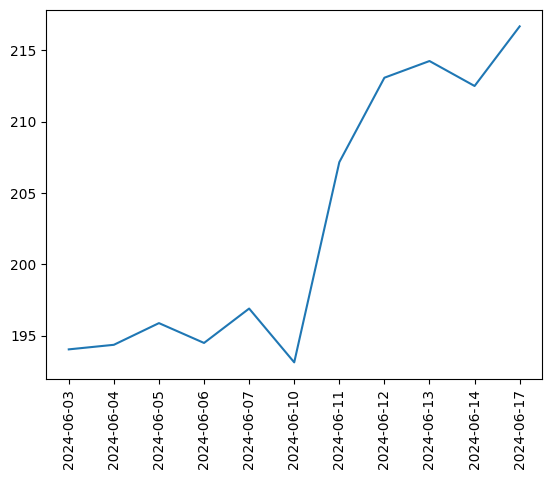

In [109]:
# get all data of month == 6
data_6 = data[data['Month']==6]
print(data_6)
# take out the Close/Last column and make it as a list
price_6 = data_6['Close/Last'].tolist()
print(price_6)
# take out the Date column and make it as a list
date_6 = data_6['Date'].tolist()
print(date_6)

plt.plot(data_6['Date'],data_6['Close/Last'])
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

[194.03, 194.35, 197.26999999999998, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67]


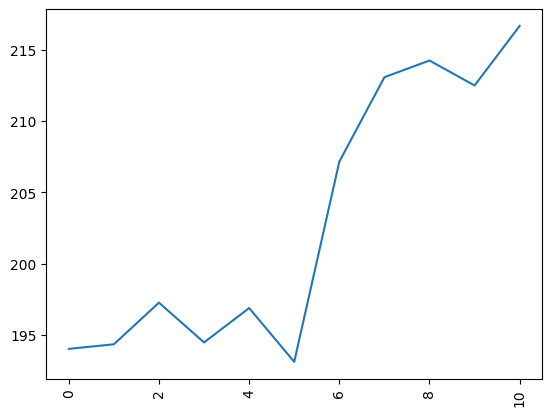

(normal)Bar: (4, 196.89) to (3, 194.48)
(normal)Bar: (2, 197.26999999999998) to (5, 193.12)
(normal)Bar: (8, 214.24) to (9, 212.49)
[[(4, 196.89), (3, 194.48)], [(2, 197.26999999999998), (5, 193.12)], [(8, 214.24), (9, 212.49)]]


In [66]:
time_series = price_6
print(time_series)
plt.figure()
plt.plot(time_series)
plt.xticks(rotation=90)
plt.show()
bar_lists = []
one_pass_bar_algorithm(time_series, bar_lists)
print(bar_lists)

In [75]:
def modify(original_time_series, difference, bar_lists):
  indices_to_be_updated_list = []
  values_to_be_updated_list = []
  for bar_list in bar_lists:
    start_idx = bar_list[0][0]
    start_val = bar_list[0][1]
    end_idx = bar_list[1][0]
    end_val = bar_list[1][1]
    if start_val - end_val > difference:
      continue
    # ---
    #  |
    #  |
    if start_idx < end_idx:
      indices_to_be_updated = []
      for i in range(start_idx+1, len(original_time_series)):
        if original_time_series[i] <= start_val:
          indices_to_be_updated.append(i)
        else:
          break
      values_to_be_updated = start_val
    # ---
    # |
    # |
    else:
      indices_to_be_updated = []
      for i in reversed(range(0, start_idx)):
        if original_time_series[i] <= start_val:
          indices_to_be_updated.append(i)
        else:
          break
      values_to_be_updated = start_val
    indices_to_be_updated_list.append(indices_to_be_updated)
    values_to_be_updated_list.append(values_to_be_updated)
  print(indices_to_be_updated_list)
  print(values_to_be_updated_list)
  return indices_to_be_updated_list, values_to_be_updated_list

original_time_series = time_series
difference = 4
indices_to_be_updated_list, values_to_be_updated_list = modify(original_time_series, difference, bar_lists)

[[3], [9]]
[196.89, 214.24]


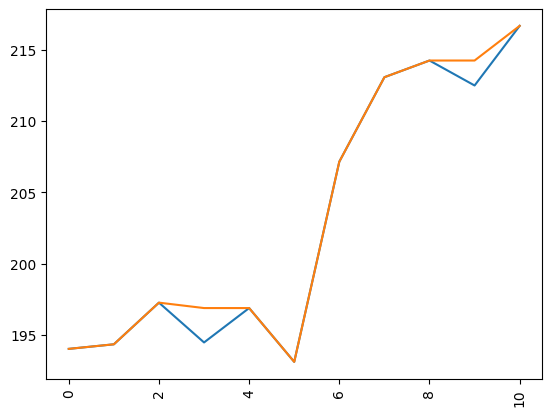

In [81]:
def get_result(time_series):
  result = time_series.copy()
  for indices_to_be_updated, values_to_be_updated in zip(indices_to_be_updated_list, values_to_be_updated_list):
    for idx in indices_to_be_updated:
      result[idx] = values_to_be_updated
  return result
updated_time_series = get_result(time_series)
plt.figure()
plt.plot(time_series)
plt.plot(updated_time_series)
plt.xticks(rotation=90)
plt.show()

In [62]:
for i in reversed(range(0, 5)):
  print(i)

4
3
2
1
0


In [ ]:
print(price_6)
print(date_6)
data = price_6
# local_min_idx = []
# local_min_val = []
# local_max_idx = []
# local_max_val = []
# # we should have at least two points in the sequence
# assert len(data) > 1
# # assume the data is increase: increasing
# #   before the first and after the last point
# if data[0] > data[1]:
#   local_max_idx.append(0)
#   local_max_val.append(data[0])
# for i in range(1, len(data)-1):
#   if data[i] > data[i-1] and data[i] > data[i+1]:
#     local_max_idx.append(i)
#     local_max_val.append(data[i])
#   if data[i] < data[i-1] and data[i] < data[i+1]:
#     local_min_idx.append(i)
#     local_min_val.append(data[i])
# if data[-2] > data[-1]:
#   local_min_idx.append(-1)
#   local_min_val.append(data[-1])
# print(local_max_idx)
# print(local_min_idx)

# # recompute the value
# new_data = []
# local_max_ptr = 0
# local_min_ptr = 0
# for i in range(len(data)):
#   if i == local_max_idx[local_max_ptr] or data[i] == local_min_idx[local_min_ptr]:

#   if i > local_max_idx[local_max_ptr]:


#   if i > local_min_idx[local_min_ptr]:

#   if local_max_ptr == local_min_ptr:



[194.03, 194.35, 195.87, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67]
['2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-17']


[4, 6, 10, 13]
[5, 7, 11, 14]
Original list: [191, 192.5, 193, 194.35, 195.87, 194.48, 196.89, 193.12, 207.15, 213.07, 214.24, 212.49, 216.67, 220, 218]
Interpolated list based on local extrema: [191.0, 192.2175, 193.435, 194.6525, 195.87, 194.48, 196.89, 193.12, 200.16, 207.20000000000002, 214.24, 212.49, 216.245, 220.0, 218.0]


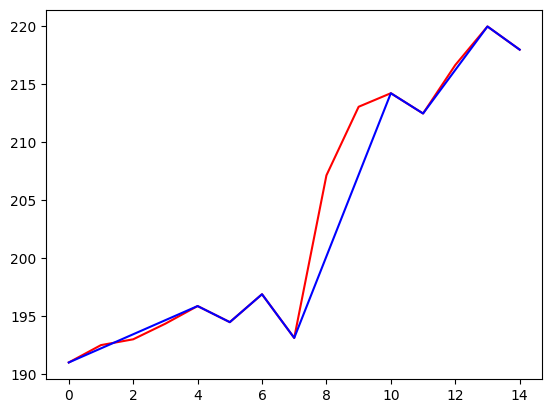

In [37]:
# get all data of month == 2
data_2 = data[data['Month']==2]
# take out the Close/Last column and make it as a list
price_2 = data_2['Close/Last'].tolist()
# take out the Date column and make it as a list
date_2 = data_2['Date'].tolist()

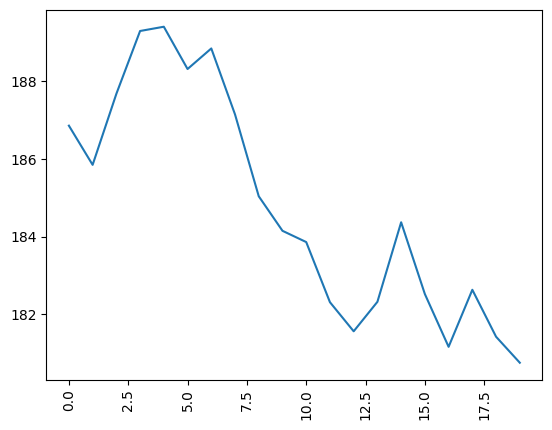

In [41]:
plt.plot(price_2)
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [42]:
one_pass_bar_algorithm(price_2)

(normal)Bar: (0, 186.86) to (1, 185.85)
(normal)Bar: (6, 188.85) to (5, 188.32)
(normal)Bar: (14, 184.37) to (12, 181.56)
(normal)Bar: (17, 182.63) to (16, 181.16)
(remaining)Bar: (4, 189.41) to (19, 180.75)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '2024-04-01'),
  Text(1, 0, '2024-04-02'),
  Text(2, 0, '2024-04-03'),
  Text(3, 0, '2024-04-04'),
  Text(4, 0, '2024-04-05'),
  Text(5, 0, '2024-04-08'),
  Text(6, 0, '2024-04-09'),
  Text(7, 0, '2024-04-10'),
  Text(8, 0, '2024-04-11'),
  Text(9, 0, '2024-04-12'),
  Text(10, 0, '2024-04-15'),
  Text(11, 0, '2024-04-16'),
  Text(12, 0, '2024-04-17'),
  Text(13, 0, '2024-04-18'),
  Text(14, 0, '2024-04-19'),
  Text(15, 0, '2024-04-22'),
  Text(16, 0, '2024-04-23'),
  Text(17, 0, '2024-04-24'),
  Text(18, 0, '2024-04-25'),
  Text(19, 0, '2024-04-26'),
  Text(20, 0, '2024-04-29'),
  Text(21, 0, '2024-04-30')])

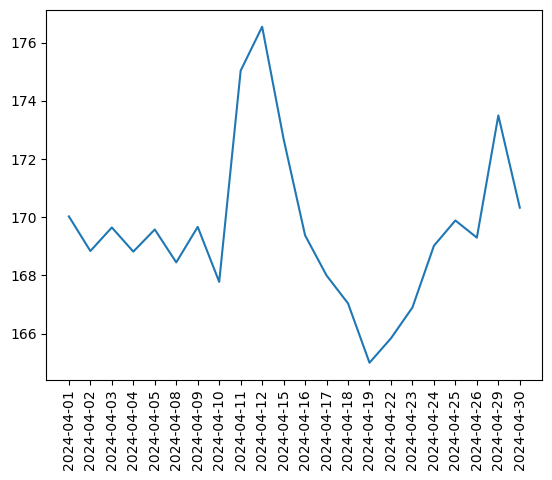

In [ ]:
data_4 = data[data['Month']==4]
plt.plot(data_4['Date'],data_4['Close/Last'])
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '2024-04-01'),
  Text(1, 0, '2024-04-02'),
  Text(2, 0, '2024-04-03'),
  Text(3, 0, '2024-04-04'),
  Text(4, 0, '2024-04-05'),
  Text(5, 0, '2024-04-08'),
  Text(6, 0, '2024-04-09'),
  Text(7, 0, '2024-04-10'),
  Text(8, 0, '2024-04-11'),
  Text(9, 0, '2024-04-12'),
  Text(10, 0, '2024-04-15'),
  Text(11, 0, '2024-04-16'),
  Text(12, 0, '2024-04-17'),
  Text(13, 0, '2024-04-18'),
  Text(14, 0, '2024-04-19'),
  Text(15, 0, '2024-04-22'),
  Text(16, 0, '2024-04-23'),
  Text(17, 0, '2024-04-24'),
  Text(18, 0, '2024-04-25'),
  Text(19, 0, '2024-04-26'),
  Text(20, 0, '2024-04-29'),
  Text(21, 0, '2024-04-30')])

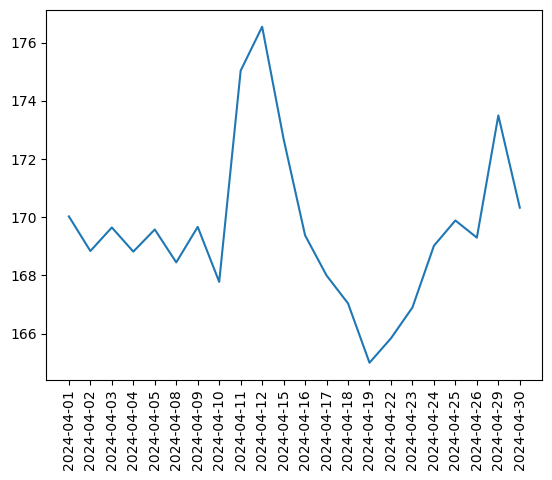

In [ ]:
data_4 = data[data['Month']==4]
# data_4 = data[(data['Date'] >= '2024-04-01') & (data['Date'] <= '2024-04-11')]
plt.plot(data_4['Date'],data_4['Close/Last'])
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [ ]:
# get all data of month == 4
data_4 = data[data['Month']==4]
# get all data from 2024-04-08 to 2024-04-25
# data_4 = data[(data['Date'] >= '2024-04-05') & (data['Date'] <= '2024-04-25')]
# data_4 = data[(data['Date'] >= '2024-04-01') & (data['Date'] <= '2024-04-11')]
# take out the Close/Last column and make it as a list
price_4 = data_4['Close/Last'].tolist()
# take out the Date column and make it as a list
date_4 = data_4['Date'].tolist()

In [ ]:
one_pass_bar_algorithm(price_4, date_4)

(normal)Bar: (2024-04-03, 169.65) to (2024-04-02, 168.84)
(normal)Bar: (2024-04-05, 169.58) to (2024-04-04, 168.82)
(normal)Bar: (2024-04-09, 169.67) to (2024-04-08, 168.45)
(normal)Bar: (2024-04-01, 170.03) to (2024-04-10, 167.78)
(normal)Bar: (2024-04-25, 169.89) to (2024-04-26, 169.3)
(remaining)Bar: (2024-04-12, 176.55) to (2024-04-19, 165.0)
(remaining)Bar: (2024-04-29, 173.5) to (2024-04-30, 170.33)


After testing for small cases, we can see the algorithm can find the bar from time_series data and the assignment of each bar is left display if the first element of the tuples is smaller for the first one i.e. Bar: (1, 216.67) to (6, 193.12); while the bar is right display if the first element of the tuples is larger for the first one i.e. Bar: (3, 214.24) to (2, 212.49)

The folling one is wrong

![image.png](attachment:image.png)

correct version

In [ ]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(0, len(time_series)-1):
        if (time_series[t+1] - time_series[t]) * direction < 0:
            if direction == 1:
                if len(maxima) != 0 and time_series[t] > maxima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(),date_list)
                maxima.append((t, time_series[t]))
            else:
                if len(minima) != 0 and time_series[t] < minima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(),date_list)
                minima.append((t, time_series[t]))
            direction = -direction
        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[-1][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[-1][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
    output_remaining_bars(maxima, minima, date_list)

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, date_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]})")
    else:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")

In [ ]:
def check_continous(time_series, date_list=None):
    continuous = False
    turning_points = 0
    diff = []
    for i in range(1, len(time_series)):
        diff.append(i - turning_points)
        if diff[-1] == diff[-2]:
            continuous = True
        else:
            continuous = False
            turning_points = 0
            diff = []
    return continuous

In [ ]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(1, len(time_series)):
        if (time_series[t] - time_series[t-1]) * direction < 0:
            if direction == 1:
                maxima.append((t-1, time_series[t-1]))
            else:
                minima.append((t-1, time_series[t-1]))
            direction = -direction
        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[0][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[0][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
    output_remaining_bars(maxima, minima, date_list)

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, date_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]})")
    else:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")

In [ ]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1
    turning_points = 0

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(1, len(time_series)):
        if (time_series[t] - time_series[t-1]) * direction < 0 and turning_points < 4:
            if direction == 1:
                maxima.append((t-1, time_series[t-1]))
            else:
                minima.append((t-1, time_series[t-1]))
            direction = -direction
            turning_points += 1
        else:
            print_flag = check_to_output_bars(time_series, maxima, minima, direction, t, date_list)
            turning_points = 0
        if turning_points == 4:
            print_flag = check_to_output_bars(time_series, maxima, minima, direction, t, date_list)
            if print_flag == 1:
                turning_points = 1
            else:
                turning_points = 4
    output_remaining_bars(maxima, minima, date_list)



def check_to_output_bars(time_series, maxima, minima, direction, t, date_list):
    print_flag = 0
    if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[0][1]:
        output_bar(maxima.pop(), minima.pop(),date_list)
        print_flag = 1
    elif direction == -1 and len(minima) != 0 and time_series[t] < minima[0][1]:
        output_bar(maxima.pop(), minima.pop(),date_list)
        print_flag = 1
    return print_flag

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, date_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]})")
    else:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")


In [ ]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1
    turning_points = 0

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(1, len(time_series)):
        print(f"[Debug]current: {t}")
        # add a judgement to check if the turningpoint is increasing as t is increasing
        flag = 0
        if turning_points


        if (time_series[t] - time_series[t-1]) * direction < 0 and turning_points < 4:
            if direction == 1:
                maxima.append((t-1, time_series[t-1]))
                print(f"[Debug]Maxima: {maxima}")
            else:
                minima.append((t-1, time_series[t-1]))
                print(f"[Debug]Minima: {minima}")
            direction = -direction
            turning_points += 1
            print(f"[Debug]Turning points: {turning_points}")
        else:
            print_flag = check_to_output_bars(time_series, maxima, minima, direction, t, date_list)
            turning_points = 0
        if turning_points == 4:
            print_flag = check_to_output_bars(time_series, maxima, minima, direction, t, date_list)
            if print_flag == 1:
                turning_points = 1
            else:
                turning_points = 4
    output_remaining_bars(maxima, minima, date_list)



def check_to_output_bars(time_series, maxima, minima, direction, t, date_list):
    print_flag = 0
    if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[-1][1]:
        output_bar(maxima.pop(), minima.pop(),date_list)
        print(f"[Debug]Maxima after: {maxima}")
        print(f"[Debug]Minima after: {minima}")
        print_flag = 1
    elif direction == -1 and len(minima) != 0 and time_series[t] < minima[-1][1]:
        output_bar(maxima.pop(), minima.pop(),date_list)
        print(f"[Debug]Maxima after: {maxima}")
        print(f"[Debug]Minima after: {minima}")
        print_flag = 1
    return print_flag

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

def output_remaining_bars(maxima, minima, date_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]})")
    else:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")


In [ ]:
def one_pass_bar_algorithm(time_series, date_list=None):
    maxima, minima = [], []
    direction = 1
    turining_point = 0

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]
    print(f"[Debug]Time series: {time_series}")

    for t in range(1, len(time_series)):
        if (time_series[t] - time_series[t-1]) * direction < 0 and turining_point < 3:
            if direction == 1:
                maxima.append((t-1, time_series[t-1]))
            else:
                minima.append((t-1, time_series[t-1]))
            direction = -direction
            turining_point += 1
        elif (time_series[t] - time_series[t-1]) * direction < 0 and turining_point == 3:
            if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[0][1]:
              print(f"[Debug]Maxima: {maxima}")
              print(f"[Debug]Minima: {minima}")
              print(f"[Debug]Turning point: {turining_point}")
              output_bar(maxima.pop(), minima.pop(),date_list)
            elif direction == -1 and len(minima) != 0 and time_series[t] < minima[0][1]:

              print(f"[Debug]Maxima: {maxima}")
              print(f"[Debug]Minima: {minima}")
              print(f"[Debug]Turning point: {turining_point}")
              output_bar(maxima.pop(), minima.pop(),date_list)
            # reset the turning point and start a new cycle
            turining_point = 0

        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[0][1]:

              print(f"[Debug]Maxima: {maxima}")
              print(f"[Debug]Minima: {minima}")
              print(f"[Debug]Turning point: {turining_point}")
              output_bar(maxima.pop(), minima.pop(),date_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[0][1]:
              output_bar(maxima.pop(), minima.pop(),date_list)
              print(f"[Debug]Maxima: {maxima}")
              print(f"[Debug]Minima: {minima}")
              print(f"[Debug]Turning point: {turining_point}")
              output_bar(maxima.pop(), minima.pop(),date_list)
          turining_point = 0
    output_remaining_bars(maxima, minima, date_list)

def output_bar(max_value, min_value, date_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")

The following one wrong

In [ ]:
# Load the data
data = pd.read_csv('/Users/eeevashen/Desktop/NWSS.csv',low_memory=False)
# print the first 5 rows of the data and the last 5 rows of the data
print(data.head())


# fix one specfice key_plot_id and take out the date_start and Difference column
data = data[data['key_plot_id']=="CDC_BIOBOT_in_1293_Treatment plant_raw wastewater"]
data = data[['date_start','Differences']]

  wwtp_jurisdiction  wwtp_id  \
0           Indiana   1293.0   
1           Indiana   1293.0   
2           Indiana   1293.0   
3           Indiana   1293.0   
4           Indiana   1293.0   

                                         key_plot_id county_names county_fips  \
0  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   
1  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   
2  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   
3  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   
4  CDC_BIOBOT_in_1293_Treatment plant_raw wastewater    St Joseph       18141   

   date_start    date_end  percentile first_sample_date  Differences  
0  2023-06-12  2023-06-26         6.0        2023-06-25          0.0  
1  2023-06-13  2023-06-27         3.0        2023-06-25         -3.0  
2  2023-06-14  2023-06-28         3.0        2023-06-25          0.0  
3  2023-06-15  2023-06-29         3.

In [ ]:
# make the date_start column as string as the format of 'YYYY-MM-DD'
data['date_start'] = pd.to_datetime(data['date_start'])
data['date_start'] = data['date_start'].dt.strftime('%Y-%m-%d')
# make the Differences column as float
data['Differences'] = data['Differences'].astype(float)
# make them as two lists
date = data['date_start'].tolist()
diff = data['Differences'].tolist()



one_pass_bar_algorithm(diff, date)

(normal)Bar: (2023-06-12, 0.0) to (2023-06-13, -3.0)
(normal)Bar: (2023-06-20, 1.1669999999999998) to (2023-06-24, 0.0)
(normal)Bar: (2023-06-25, 4.300000000000001) to (2023-06-26, 0.0)
(normal)Bar: (2023-07-09, 7.75) to (2023-07-10, 0.0)
(normal)Bar: (2023-07-11, 9.5) to (2023-07-08, 0.0)
(normal)Bar: (2023-07-18, 7.549999999999997) to (2023-07-29, 0.0)
(normal)Bar: (2023-07-30, 15.200000000000005) to (2023-07-16, -6.25)
(normal)Bar: (2023-08-22, 3.0) to (2023-08-01, -8.332999999999998)
(remaining)Bar: (2023-06-18, 5.333) to (2023-06-19, 0.0)
(remaining)Bar: (2023-06-27, 13.8) to (2023-07-03, 0.0)
(remaining)Bar: (2023-07-04, 11.65) to (2023-08-27, -13.667000000000002)
(remaining)Bar: (2023-08-28, 0.0) to (2023-08-29, -5.082999999999998)


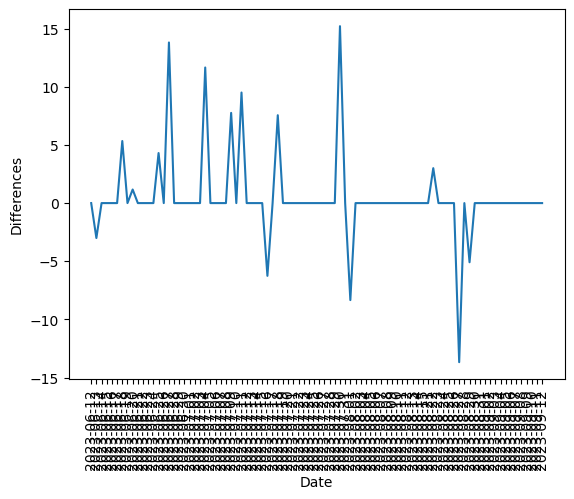

In [ ]:
# plot the difference and date_start
plt.plot(data['date_start'],data['Differences'])
plt.xlabel('Date')
plt.ylabel('Differences')
plt.xticks(rotation=90)
plt.show()